In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

X, y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y)

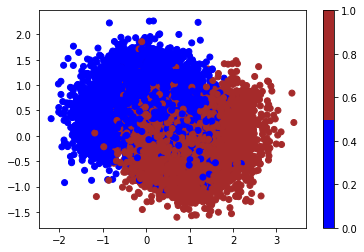

In [2]:
colors = ['blue', 'brown']
plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)],
                voting ='hard')

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8368
RandomForestClassifier 0.8384
SVC 0.8604
VotingClassifier 0.8576


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
# soft voting
svmp_clf = SVC(probability=True)

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf), ('rf', rnd_clf), ('svmp', svmp_clf)],
                voting ='soft')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svmp_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8368
RandomForestClassifier 0.836
SVC 0.8604
VotingClassifier 0.8596


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging and Pasting

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
              DecisionTreeClassifier(), n_estimators=500,
              max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [9]:
print ("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.8648


### pasting variation

In [10]:
bag_clf = BaggingClassifier(
              DecisionTreeClassifier(), n_estimators=500,
              max_samples=100, bootstrap=False, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print ("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.8656


## out of bag scoring

In [11]:
bag_clf = BaggingClassifier(
              DecisionTreeClassifier(), n_estimators=500,
              max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8592

In [12]:
y_pred = bag_clf.predict(X_test)

print ("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.8624


In [13]:
bag_clf.oob_decision_function_

array([[0.03869654, 0.96130346],
       [0.95121951, 0.04878049],
       [0.51626016, 0.48373984],
       ...,
       [0.20040486, 0.79959514],
       [0.55983773, 0.44016227],
       [0.78744939, 0.21255061]])

## Random Forest Classifier

In [14]:
rf_clf = RandomForestClassifier(
              n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print ("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.864


In [15]:
#  using bagging classifier to force a random forest like result
bag_clf = BaggingClassifier(
              DecisionTreeClassifier(splitter='random', max_leaf_nodes=16), n_estimators=500,
              max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print ("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.8632


## extra trees

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(
              n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
et_clf.fit(X_train, y_train)
y_pred = et_clf.predict(X_test)

print ("Accuracy is {}".format(accuracy_score(y_test, y_pred)))



Accuracy is 0.8568


## Feature Importance

In [17]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.1063755799756137
sepal width (cm) 0.021313678933949386
petal length (cm) 0.4391949969157991
petal width (cm) 0.43311574417463794


## gradient boosted regression trees

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error



np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
         for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)
print("best estimator is {}\n".format(bst_n_estimators))

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

best estimator is 76



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=76, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

## using warm_start to incrementally train

In [27]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break #early stop